https://physicsderivationgraph.blogspot.com/2020/05/characterizing-latex-content-in.html

In this notebook methods for extracting math expressions are explored:
* regex
* TexSoup

_Results_: 
* TexSoup is very slow (because it creates a complex data structure per document) and therefore isn't suitable for bulk processing. Therefore regex is preferrable
* TexSoup errors on invalid LaTeX and halts processing

Also investigated tex2py but that doesn't seem to be relevant for the tasks

# load libraries

In [1]:
# https://github.com/alvinwan/tex2py
!pip install tex2py

In [2]:
# https://github.com/alvinwan/TexSoup
!pip install texsoup

In [3]:
import re
import sys
print(sys.version)
import time
import glob
import matplotlib.pyplot as plt

3.6.6 | packaged by conda-forge | (default, Oct 12 2018, 14:08:43) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


# download data

https://www.cs.cornell.edu/projects/kddcup/datasets.html

In [4]:
#!tar xzvf hep-th-2003.tar.gz

In [5]:
!ls -hal 2003/ | wc -l

1022


# load data

In [6]:
list_of_files = glob.glob('2003/*')

In [7]:
# how many files are in the corpus?
len(list_of_files)

1019

In [8]:
# what's the first file name?
list_of_files[0]

'2003/0301116'

In [9]:
# load data from the first file
with open(list_of_files[0], 'r') as f:
    data = f.read()

In [10]:
# quick preview of file content
data[0:100]

'\n\n%******************LATEX FILE OF THE PAPER***********************\n%\n%\n\n%%%%%%%%%%%%%%%%%%%%%%%%%%%'

# method 1: find relevant tags in latex using regex

this section relies on regex instead of using a library

In [11]:
start_time=time.time()
regex_reslts={}
number_of_eq=0
for this_file in list_of_files:
    with open(this_file,'rb') as f:
        data = f.read()
    
    resp = re.findall('\\\\begin{(?:eqnarray|equation|multiline)}.*?end{(?:eqnarray|equation|multiline)}',str(data),re.DOTALL)
#    print(this_file)
    for eq in resp:
        number_of_eq+=1
        try:
            regex_reslts[this_file].append(eq)
        except KeyError:
            regex_reslts[this_file]=[]
            regex_reslts[this_file].append(eq)
#        print('  ',eq,'\n')

print(round(time.time()-start_time,2),'seconds')

6.79 seconds


In [12]:
# number of matching candidates in .tex files
number_of_eq

29481

In [13]:
# number of files containing candidates
len(regex_reslts.keys())

929

In [14]:
# first file results
regex_reslts[list(regex_reslts.keys())[0]]

['\\begin{equation}}\\n\\\\newcommand{\\\\eeq}{\\\\end{equation}',
 '\\begin{eqnarray}}\\n\\\\newcommand{\\\\eeqa}{\\\\end{eqnarray}']

In [15]:
# first expression in the second file results
regex_reslts[list(regex_reslts.keys())[1]][0]

'\\begin{equation}\\\\label{planewave}\\n\\\\begin{split}\\nds^2 & = 2dx^+dx^--\\\\m^2\\\\vec{x}^2\\\\bigl(dx^+\\\\bigr)^2+d\\\\vec{x}^2\\\\,,\\\\\\\\\\nF_5 & = 4\\\\m dx^+\\\\wedge\\\\bigl(dx^1\\\\wedge dx^2\\\\wedge dx^3\\\\wedge dx^4+dx^5\\\\wedge dx^6\\\\wedge dx^7\\\\wedge dx^8\\\\bigr)\\\\,.\\n\\\\end{split}\\n\\\\end{equation}'

# visualize results

In [16]:
number_of_eq_per_file=[]
for k,v in regex_reslts.items():
    number_of_eq_per_file.append(len(v))

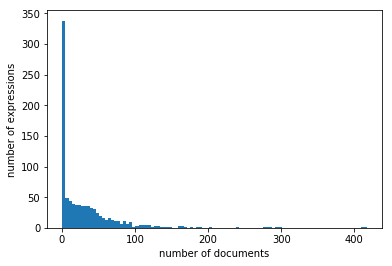

In [17]:
_=plt.hist(number_of_eq_per_file,bins=100)
_=plt.ylabel('number of expressions')
_=plt.xlabel('number of documents')

### use a log-y scale since there is a lot of variation

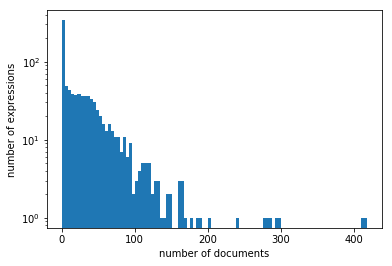

In [18]:
_=plt.hist(number_of_eq_per_file,bins=100)
_=plt.yscale('log', nonposy='clip')
_=plt.ylabel('number of expressions')
_=plt.xlabel('number of documents')

# parse the Latex using libraries


options: 
* http://plastex.sourceforge.net/plastex/sect0025.html
* tex2py - https://github.com/alvinwan/tex2py
* texsoup - https://texsoup.alvinwan.com/docs/quickstart.html; https://github.com/alvinwan/TexSoup

## tex2py

https://github.com/alvinwan/tex2py - "converts LaTeX into a Python parse tree, allowing navigation using the default or a custom hierarchy"<BR>
Built on top of TexSoup

BHP: I am unable to extract math or text using this library. tex2py seems to be intended for document hierarchy

In [19]:
# https://github.com/alvinwan/tex2py
from tex2py import tex2py

In [20]:
list_of_files[1]

'2003/0304232'

In [21]:
with open(list_of_files[1]) as f: data = f.read()

# this takes a long time because it relies on texSoup
start_time = time.time()
toc = tex2py(data)
print('elapsed =', round(time.time()-start_time,2),'seconds')

elapsed = 41.52 seconds


In [22]:
toc.valid_tags[0:10]

('addcontentsline',
 'addtocontents',
 'addtocounter',
 'address',
 'addtolength',
 'addvspace',
 'alph',
 'appendix',
 'arabic',
 'author')

In [23]:
toc.branches

[Introduction,
 Preliminaries,
 A supersymmetric extension in the $SO(4)\times SO(4)$ \\ formalism,
 Anomalous dimension from string field theory,
 Conclusions,
 Conventions and Notation,
 Useful identities and (anti)commutators,
 More detailed computations,
 Functional expressions for the prefactor]

## TexSoup

https://texsoup.alvinwan.com/docs/quickstart.html

In [24]:
from TexSoup import TexSoup

### single document

In [25]:
with open(list_of_files[1]) as f: data = f.read()

In [26]:
data[0:200]

'\\documentclass[12pt]{article}\n\\usepackage{graphics}\n\\usepackage{epsfig}\n\\usepackage{color}\n\\usepackage{amsmath}\n\\usepackage{amssymb}\n\\def\\da{\\dot{\\alpha}}\n\\def\\db{\\dot{\\beta}}\n\\def\\dg{\\dot{\\gamma}}\n\\d'

In [27]:
start_time=time.time()
soup = TexSoup(data)
print(round(time.time()-start_time,2),'seconds')

35.66 seconds


In [28]:
list(soup.text)[0:20]

['12pt',
 'article',
 'graphics',
 'epsfig',
 'color',
 'amsmath',
 'amssymb',
 '\\dot',
 '\\dot',
 '\\dot',
 '\\dot',
 '\\Gamma',
 '\\Delta',
 '\\Lambda',
 '\\Sigma',
 '\\alpha',
 '\\beta',
 '\\gamma',
 '\\delta',
 '\\varepsilon']

In [29]:
soup.equation

\begin{equation}\label{planewave}
\begin{split}
ds^2 & = 2dx^+dx^--\m^2\vec{x}^2\bigl(dx^+\bigr)^2+d\vec{x}^2\,,\\
F_5 & = 4\m dx^+\wedge\bigl(dx^1\wedge dx^2\wedge dx^3\wedge dx^4+dx^5\wedge dx^6\wedge dx^7\wedge dx^8\bigr)\,.
\end{split}
\end{equation}

In [30]:
lst = list(soup.find_all('equation'))

In [31]:
# how many equations are in the document?
len(lst) 

79

In [32]:
# show the first match
lst[0] 

\begin{equation}\label{planewave}
\begin{split}
ds^2 & = 2dx^+dx^--\m^2\vec{x}^2\bigl(dx^+\bigr)^2+d\vec{x}^2\,,\\
F_5 & = 4\m dx^+\wedge\bigl(dx^1\wedge dx^2\wedge dx^3\wedge dx^4+dx^5\wedge dx^6\wedge dx^7\wedge dx^8\bigr)\,.
\end{split}
\end{equation}

In [33]:
# what is the string inside the "begin{equation}"?
lst[0][0] 

'\\label{planewave}\n\\begin{split}\nds^2 & = 2dx^+dx^--\\m^2\\vec{x}^2\\bigl(dx^+\\bigr)^2+d\\vec{x}^2\\,,\\\\\nF_5 & = 4\\m dx^+\\wedge\\bigl(dx^1\\wedge dx^2\\wedge dx^3\\wedge dx^4+dx^5\\wedge dx^6\\wedge dx^7\\wedge dx^8\\bigr)\\,.\n'

In [34]:
lst[1]

\begin{equation}
\o_n=\sqrt{n^2+\bigl(\m\a'p^+\bigr)^2}\,,\qquad n\in\Nop\,,
\end{equation}

In [35]:
lst[1][0]

"\n\\o_n=\\sqrt{n^2+\\bigl(\\m\\a'p^+\\bigr)^2}\\,,\\qquad n\\in\\Nop\\,,\n"

In [36]:
for this_eq in list(soup.find_all('equation'))[0:3]: # convert generator to list so we can limit returns to the first 10
    print(this_eq[0])

\label{planewave}
\begin{split}
ds^2 & = 2dx^+dx^--\m^2\vec{x}^2\bigl(dx^+\bigr)^2+d\vec{x}^2\,,\\
F_5 & = 4\m dx^+\wedge\bigl(dx^1\wedge dx^2\wedge dx^3\wedge dx^4+dx^5\wedge dx^6\wedge dx^7\wedge dx^8\bigr)\,.


\o_n=\sqrt{n^2+\bigl(\m\a'p^+\bigr)^2}\,,\qquad n\in\Nop\,,

\label{dict}
\frac{1}{\m}H = \D-J\,,\qquad \frac{1}{\bigl(\m\a'p^+\bigr)^2} = \frac{g^2_{\text{YM}}N}{J^2}\equiv \l'\,,\qquad
4\pi g_{\text{s}}\bigl(\m\a'p^+\bigr)^2 = \frac{J^2}{N}\equiv g_2



### loop over all documents

In [46]:
start_time=time.time()
texsoup_reslts={}
number_of_eq=0
for this_file in list_of_files:
    loop_time=time.time()
    print(this_file)
    try:
        with open(this_file,'r', encoding='utf-8') as f:
            data = f.read()
    except UnicodeDecodeError as err:
        print(err)
        try: 
            with open(this_file,'r', encoding='ISO-8859-1') as f:
                data = f.read()
        except Exception as err:
            print(err)
    
    soup = TexSoup(data)
    lst = list(soup.find_all('equation'))
    for eq in lst:
        number_of_eq+=1
        try:
            texsoup_reslts[this_file].append(eq)
        except KeyError:
            texsoup_reslts[this_file]=[]
            texsoup_reslts[this_file].append(eq)
#        print('  ',eq,'\n')
    print(round(time.time()-loop_time,2),'seconds')
print(round(time.time()-start_time,2),'seconds')

2003/0301116
5.8 seconds
2003/0304232
38.98 seconds
2003/0303017
45.22 seconds
2003/0303225
50.13 seconds
2003/0302131
'utf-8' codec can't decode byte 0xa0 in position 38109: invalid start byte
58.96 seconds
2003/0303028
63.64 seconds
2003/0301129
75.12 seconds
2003/0302136


TypeError: Malformed argument. First and last elements must match a valid argument format. In this case, TexSoup could not find matching punctuation for: ['[', 'b', '}'].
Common issues include: Unescaped special characters, mistyped closing punctuation, misalignment.

In [42]:
import chardet

In [43]:
with open('2003/0302131','rb') as f:
        data = f.read()

In [44]:
chardet.detect(data)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [47]:
with open("2003/0302136",'r') as f:
    data = f.read()

In [48]:
data

"\\documentstyle{article}[12pt]\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% DEFINITIES\n%%%%%%%%%%%%%%%%%%%%%%%%\n\\newcommand{\\fig}[1]{fig.\\ (\\ref{#1})}\n%\\usepackage{epsfig\\renewcommand{\\epsfig}[1]{#1}\n%\\newcommand{\\smcap}[1]{\\caption{\\small{#1}}}\n%\\def\\figurename{\\small{Figure}}\n\\def\\dd{\\mbox{d}}\n\\def\\ddd{\\mbox{\\sm d}}\n\\def\\O{\\Omega}\n\\def\\o{\\omega}\n\\def\\bra{\\langle}\n\\def\\ket{\\rangle}\n\\def\\a{\\alpha}\n\\def\\b{\\beta}\n\\def\\d{\\delta}\n\\def\\D{\\Delta}\n\\def\\LL{\\triangle}\n\\def\\g{\\gamma}\n\\def\\G{\\Gamma}\n\\def\\e{\\epsilon}\n\\def\\ve{\\varepsilon}\n\\def\\et{\\eta}\n\\def\\f{\\phi}\n\\def\\F{\\Phi}\n\\def\\vf{\\varphi}\n\\def\\k{\\kappa}\n\\def\\l{\\lambda}\n\\def\\L{\\Lambda}\n\\def\\m{\\mu}\n\\def\\n{\\nu}\n\\def\\s{\\sigma}\n\\def\\o{\\omega}\n\\def\\p{\\pi}\n\\def\\r{\\rho}\n\\def\\t{\\tau}\n\\def\\th{\\theta}\n\\def\\vt{\\vartheta}\n\\def\\ra{\\rightarrow}\n\\def\\la{\\leftarrow}\n\\def\\pa{\\partial}\n\\def\\ov{\\overline}\n\\def\\Pl{